# Selenium

We have already learned about Beautiful Soup. In this we will go through a more advanced type of web scraper: Selenium. 

"Selenium is a Python library and tool used for automating web browsers to do a number of tasks. One of such is web-scraping to extract useful data and information that may be otherwise unavailable." - towardsdatascience

In short: Selenium is an advanced webscraper that can control web browsers for more advanced web scraping. It can simulate mouse clicks and fill out forms.

What benefits does Selenium provide over Beautiful Soup?
* Selenium is ideal for more advanced projects whereas Beautiful Soup is more useful for smaller projects. 
* Selenium is slower and does take longer to run than Beautiful Soup. 

None of that is to say that Selenium is better than Beautiful Soup! The choice simply stems from the scope of a web scraping project.

**Note: If you do not have Selenium installed then you will have to run a '!pip install Selenium' in your local environment**

In [1]:
# only run if you do not have Selenium installed 
#!pip install Selenium

Selenium works by controlling something called a **webdriver**. A webdriver is what is actually pushing buttons and filling out forms in websites. It allows for more advanced functionality. 

I would recommend using a Chrome Driver. However, there are drivers available in your browser of choice.

We will do this using the Chrome Driver.

For installing Chrome Driver:

 1.) Go to https://chromedriver.chromium.org/downloads
 
 2.) You will need to select the correct version to download based on your version of Chrome. To know which version to download do the following:
 * Click the three dots in the upper right corner of the screen. Then click "help" then select "About Google Chrome". You should see the the following on your screen. Based on this image the version of Chrome Driver that I would download is Version 103.
 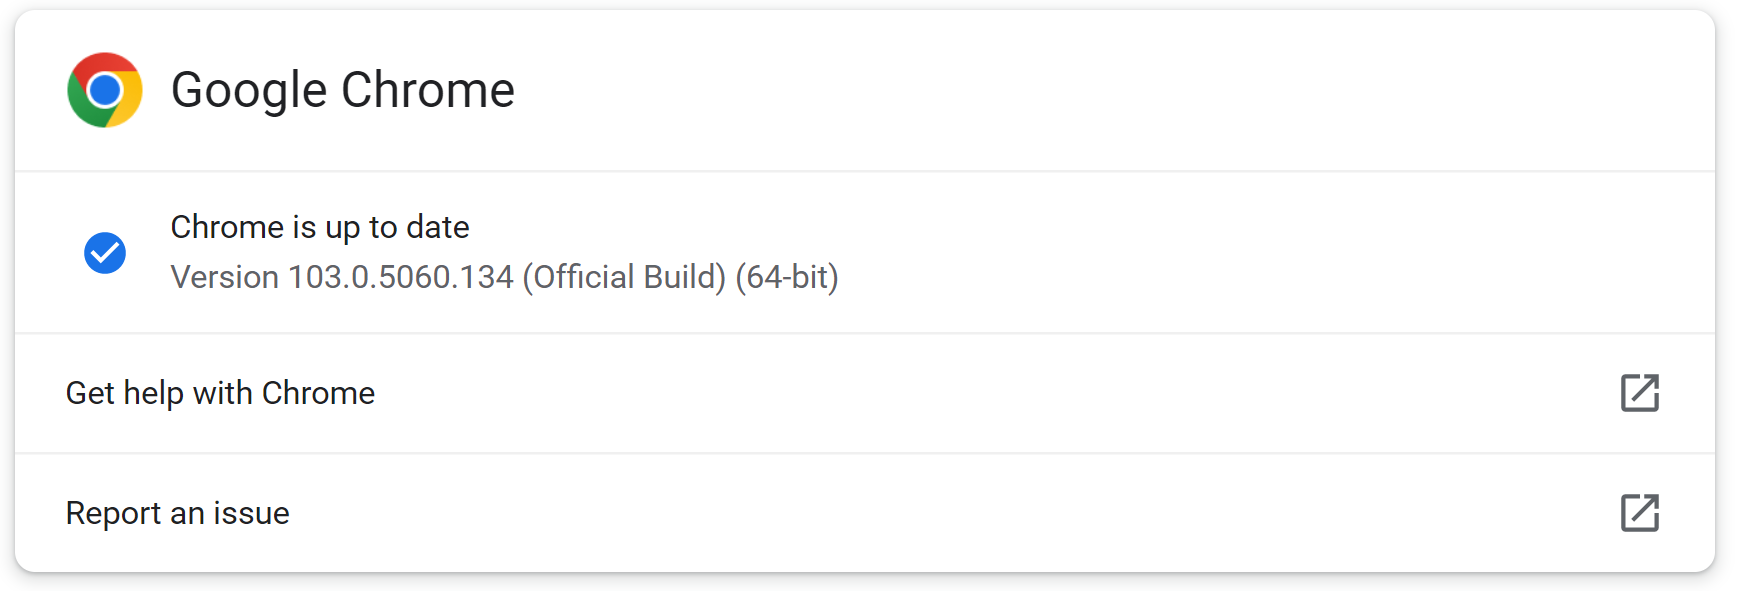
 
 Based on what verison of Chrome you are using download that respective Chrome Driver from https://chromedriver.chromium.org/downloads . 
 
 Unzip that file and save that chromedriver.exe file somewhere on your computer. It is **very important** that you know where you have saved that file to as we need the path of the driver to do web scraping!
 
 We can now get started.
 
 First for the imports:

In [15]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
import time
import pandas as pd
from pandas import DataFrame

In [16]:
# this is the website that we will scrape
website = 'https://www.adamchoi.co.uk/overs/detailed' 

# my chrome driver is in my desktop. So the path to the Chrome Driver is the absolute path to the Desktop
path = '/Users/Owner/Desktop/chromedriver_win32/chromedriver.exe' 

# this is how we get the actual Chrome Driver object that will control our website for scraping.
driver = webdriver.Chrome(path) 

<ipython-input-16-aca6e84abe71>:8: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(path)


In [17]:
driver.get(website) # this tells the driver what website to control

Once you run the above snippet of code you should see the website pop up. Navigate to that website and you should also see the following in the top left of the browser right below the url.
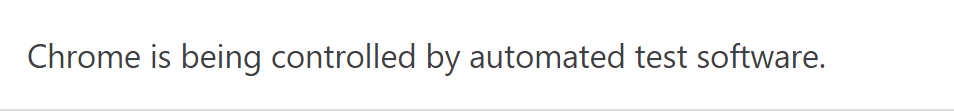

This tells us that the Chrome Driver is actively controlling that webpage.



In order to use Selenium we need to use something called an **XPath**. An XPath is "a technique that allows you to navigate the structure of a webpage's HTML". Sometimes HTML code do not have things like ID's or classes associated with them. This is where Selenium comes in more handy than Beautiful Soup as it can navigate more complicated situations. We will see shortly where this XPath comes into play. 

Go ahead and navigate to that website that we are scraping. 

You should see a "All Matches" button. Go ahead and right click on that button and select the "Inspect" option. You should see the following HTML code for that button below:

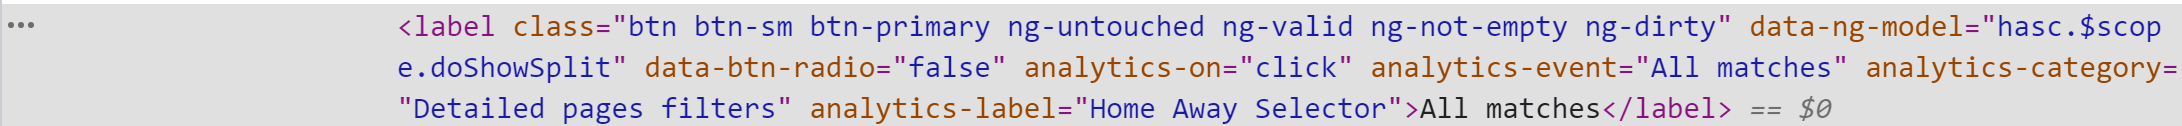

Woah! That HTML code is a lot more confusing than what we saw before using Beautful Soup. Cases like this is where using an XPath really becomes quite handy. 

In order to find an XPath we need to tell the driver to find an element. To do this we use the find_element() function on our driver object. The syntax for that function is as follows: driver.find_element(By.XPATH, 'the actual XPath'). This tells the driver to find a certain element in the HTML code by its XPath and then give it the actual XPath to find. 

Let's find the XPath of that "All Matches" button. 

XPath's take on the following syntax:
//tagType[@AttributeName="Value"]

We need to find three things:

    1.) The tag that is used.
    2.) The attribute name
    3.) The value corresponding to that name.

We already know what the value is: "All matches". So what we need to do now is look into that HTML code and find the attribute that defines "All matches". I will help you out. Pay attention to this tidbit of code:
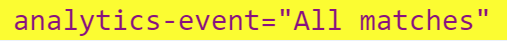

What we can tell from this snippet of code is that the 'AttributeName' that we need is 'analytics-event'. 
    
From there refer back to our lecture regarding Beautful Soup and what a "tag" was in html code. Well in this case as you can see from the above html code of that "All Matches" button the tag is a "label". 

So our XPath should look something like this:
//label[@analytics-event="All matches"]

We can fact check this:

    1.) In the "Inspect" window hit "Ctrl + f".
    2.) Copy and paste the above XPath in and the resulting highlighted piece of HTML code should match what is shown in the above snippet of the html for the button.
    
Now we can actually do things!

Let's do that find_element() function that we talked about above.

In [18]:
all_matches_button = driver.find_element(By.XPATH, '//label[@analytics-event="All matches"]')

This part is what makes Selenium more versatile than Beautiful Soup. In Selenium you can use the driver to actually press buttons on the webpage. All we need is the .click() function. 

So let's do it. Click that "All Matches" button!

In [19]:
all_matches_button.click()

There is one little problem. The website auto defaults to the 2022-2023 season and since that season has not started yet there is no data to scrape! 

Luckily for us, Selenium offers a way to choose options from a dropdown menu with the Select import.

Go ahead and right click on the "Select Season" drop down and then click "Inspect". You should see the following HTML code:

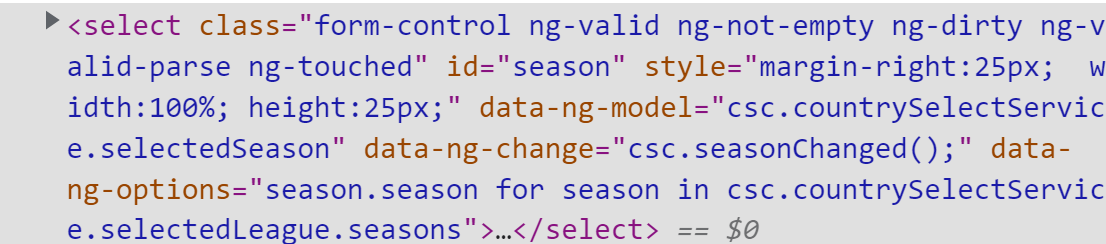

What I find most useful in that code is the **id="season"** part of it. We can use the find_element() function again on the driver to find an element by its id. The syntax for using the Select import and using that find_element function will be as follows:

Select(driver.find_element(By.ID, 'season'))

This makes sense since we know we want to find the element by its ID and because we know the ID's name is 'season'.

Let's put that into code.

dropdown1.select_by_visible_text('Spain')
time.sleep(3)
dropdown1 = Select(driver.find_element(By.ID, 'country'))

In [20]:
dropdown = Select(driver.find_element(By.ID, 'season'))

Now we need to actually select the season that we want information from. Let's use the 2021-2022 season for now.

If you click on the "Select Season drop down you will see a '21/22' option. This is the option we want. We now need to tell Selenium to select that option and then we can begin scraping. 

Selenium has a **select_by_visible_text()** function which is called on the select object and is used to actually select a value. The parameter it takes in is the value itself to select. 

Let's show this in code:

In [21]:
dropdown.select_by_visible_text('21/22')

Selenium will instantly begin scraping once you run that above code so sometimes it is necessary to tell Selenium to wait a bit to scrape before the webpage can reload from a change in selection. 

This is done by doing **time.sleep()** with some number passed in as the parameter. That number just tells the driver how long to wait before scraping. I will use 3 seconds, but it does not necessarily matter. 



From there you should see the below table:
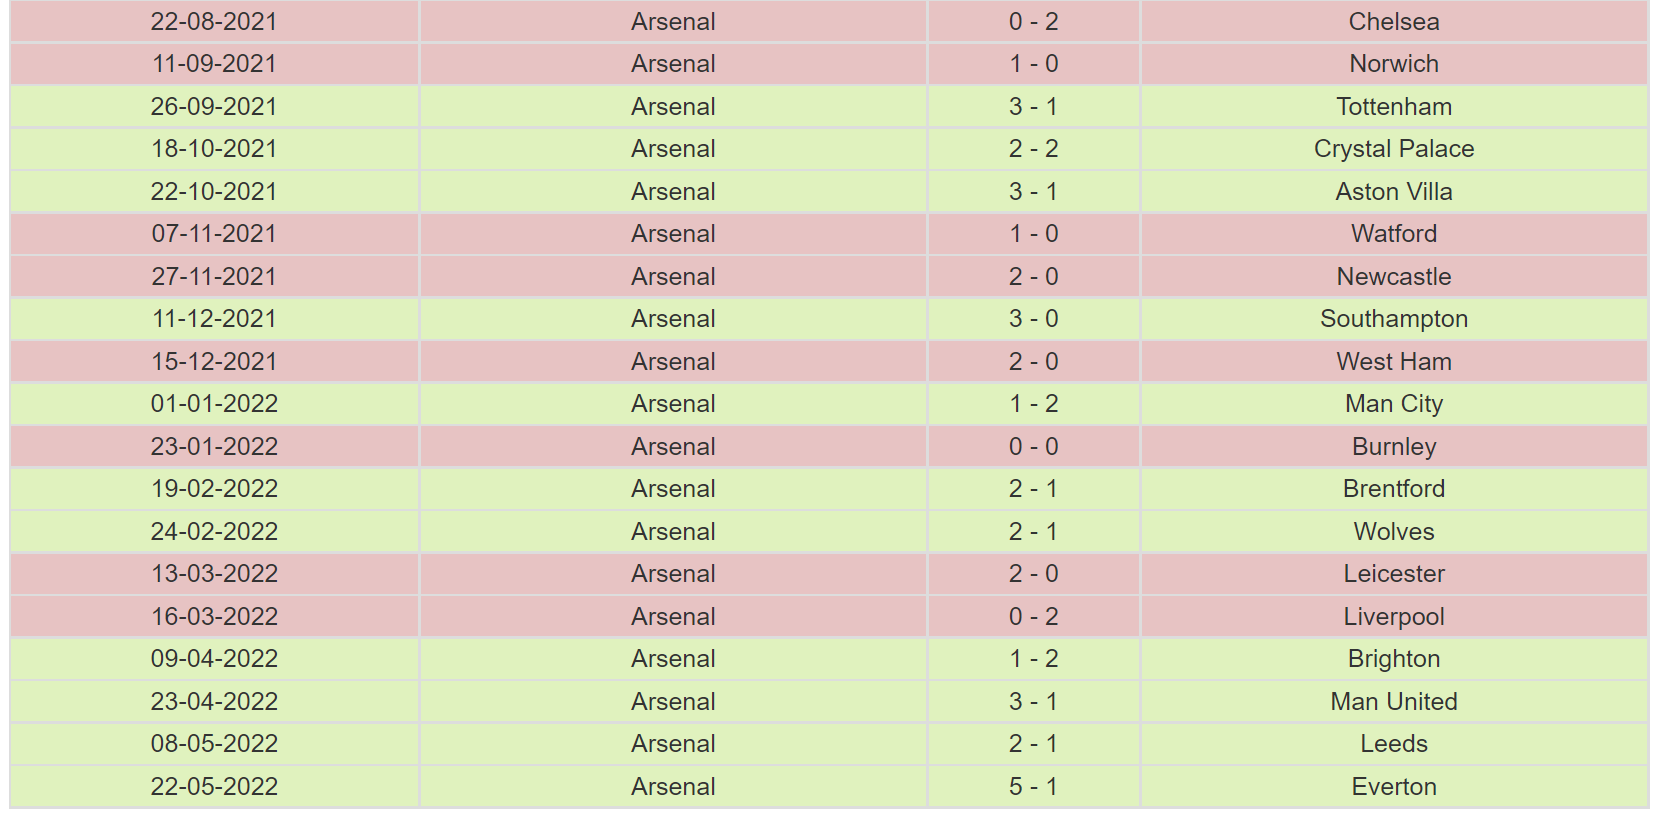

Little more quick information about tags.

Most often when working with tables such as the one in the image there are two predominant tags used in HTML code: **tr** and **td**. 

tr refers to an entire row in the data.
td refers to the piece of data in a particular cell in that row. 

So in that above screenshot there would be 4 **td** elements inside a single **tr** element (4 cells in a row). 

As you can see each row is one soccer match. So to start let's just go row by row of getting soccer matches and storing them all into a variable for further data preprocessing. 

To do that we use the find_elements() function on the driver. 

**Note that there is a difference between find_elements() and find_element().** find_element() is for finding a single element as we did above, whereas here we want to scrape multiple rows (multiple elements) so we use the find_elements() function.

tr and td are **tags** so we want to tell the driver to find the elements by their tagname and then denote the tag associated with that tag name. This is down below.

In [22]:
# each row in one element stored in matches
matches = driver.find_elements(By.TAG_NAME,'tr') 

Now we actually want to get more information based on the score, home team, away team, etc. Since the elements in 'matches' are rows we can revert to our Intro to Computer Science days and we can simply utilize a for loop over matches to get specific values in the row. 

There are four elements in each row. So let's define four lists: one for the date, one for the home_team, one for the score, and one for the away_team. 

In [23]:
date = []
home_team = []
score = []
away_team = []

We know that we need to append to each of these lists to actually fill them. But **what** exactly do we append?

Well remember above when we mentioned that it was a td that was actually inside a tr? We can denote just specifcy which td (cell) to append to a respective list!

Go ahead and right click on the top left piece of data in the table. Hit 'Inspect' and go ahead and look at the HTML code again. 

That html code looks rather confusing right...? Well that is okay. We can just go back to getting that element by its XPath!

Again we are going to use the find_element() function. But what exactly does the XPath for this look like?

Right now we will only care about scraping the data in that first column (the dates). 

Turns out it is a lot simpler than the previous XPath we found. Our current directory (in matches) is 'tr'. And we know that td is inside that tr so we can denote the XPath just as './td[1]'.

The './' denotes the current directory. So this path is equivalent to 'tr/td[1]'. Using './' just makes the path look cleaner. 

But why the [1]? Well the date is the first td inside of that tr element (the first index!). Keep in mind that XPath's are indexed starting at 1 **not** 0! 

We can then use the .text function on that element to get the actual text of the what is in that respective cell.

Let's put it all together and see how it looks.

**Note that this takes A WHILE TO RUN. Be patient!**.

In [24]:
for match in matches:
    # these are the dates
    date.append(match.find_element(By.XPATH, './td[1]').text)
    
    # these are for the home team
    home_team.append(match.find_element(By.XPATH, './td[2]').text) 
    
    # this is the score
    score.append(match.find_element(By.XPATH, './td[3]').text) 
    
    # this is the away team
    away_team.append(match.find_element(By.XPATH, './td[4]').text)

From here we are done scraping and we can tell the driver to stop controlling the webpage. 

In [25]:
driver.quit()

So now we have our data.. great? Now what? Well let's refer back to Lecture 9 put this into a DataFrame for even further data preprocessing. 

In [26]:
df = pd.DataFrame({'date': date, 'home_team': home_team, 'score': score, 'away_team': away_team})

# and as you can see the data has been successfully put into a DataFrame.
df.head()

,date,home_team,score,away_team
0,13-08-2021,Brentford,2 - 0,Arsenal
1,22-08-2021,Arsenal,0 - 2,Chelsea
2,28-08-2021,Man City,5 - 0,Arsenal
3,11-09-2021,Arsenal,1 - 0,Norwich
4,18-09-2021,Burnley,0 - 1,Arsenal


We can also send the data to a csv file for future analysis. Run the below code and you should see the folling csv of all of the data in your local directory.

In [27]:
df.to_csv('soccer_data.csv', index=False)

## Do It Yourself!

This part is all up to you! You can choose between different countries, different leagues, or different years. Play around with Selenium and the driver and see what you can scrape for yourself!

In [55]:
# your code!